In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

# Sparsity Heart

In [3]:
register_matplotlib_converters()
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

<Figure size 432x288 with 0 Axes>

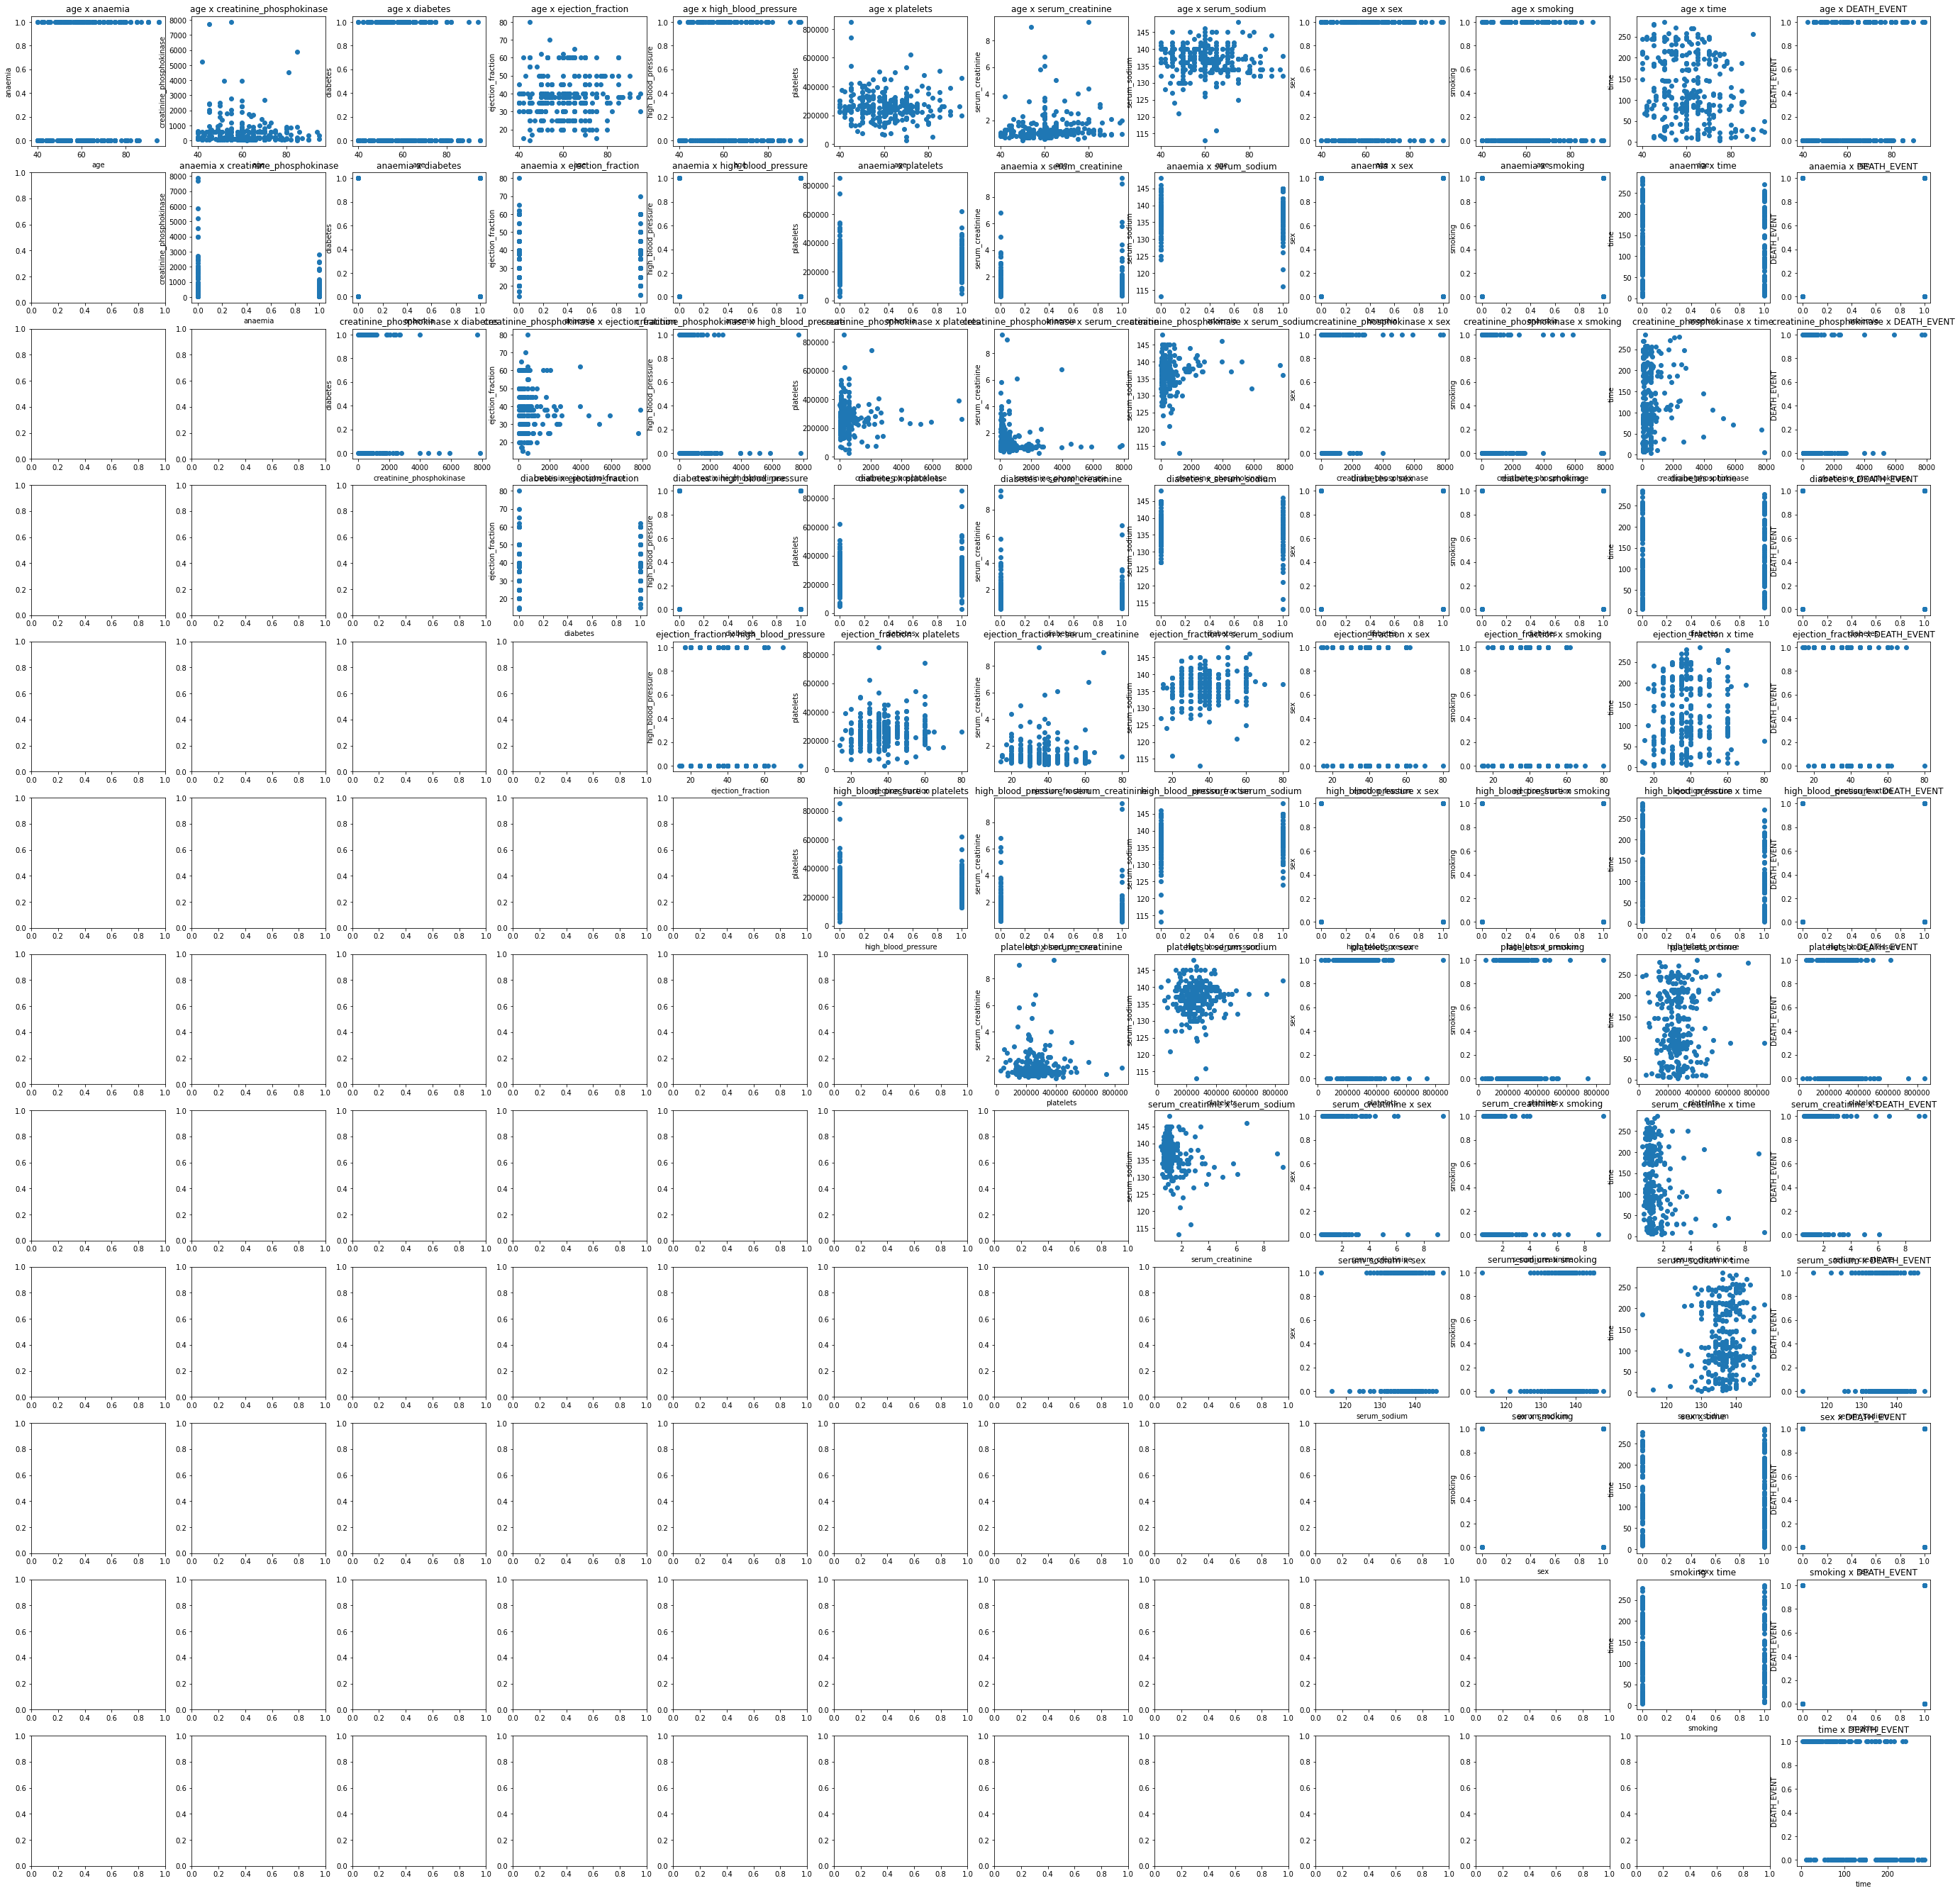

In [10]:
columns = data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1

#rows,cols= 10, 10
#columns= columns[485:495]

plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
plt.show()

scatter plots with target class marked in red

In [15]:
# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==1:
            cols.append('red')
        else:
            cols.append('blue')
    return cols

<Figure size 432x288 with 0 Axes>

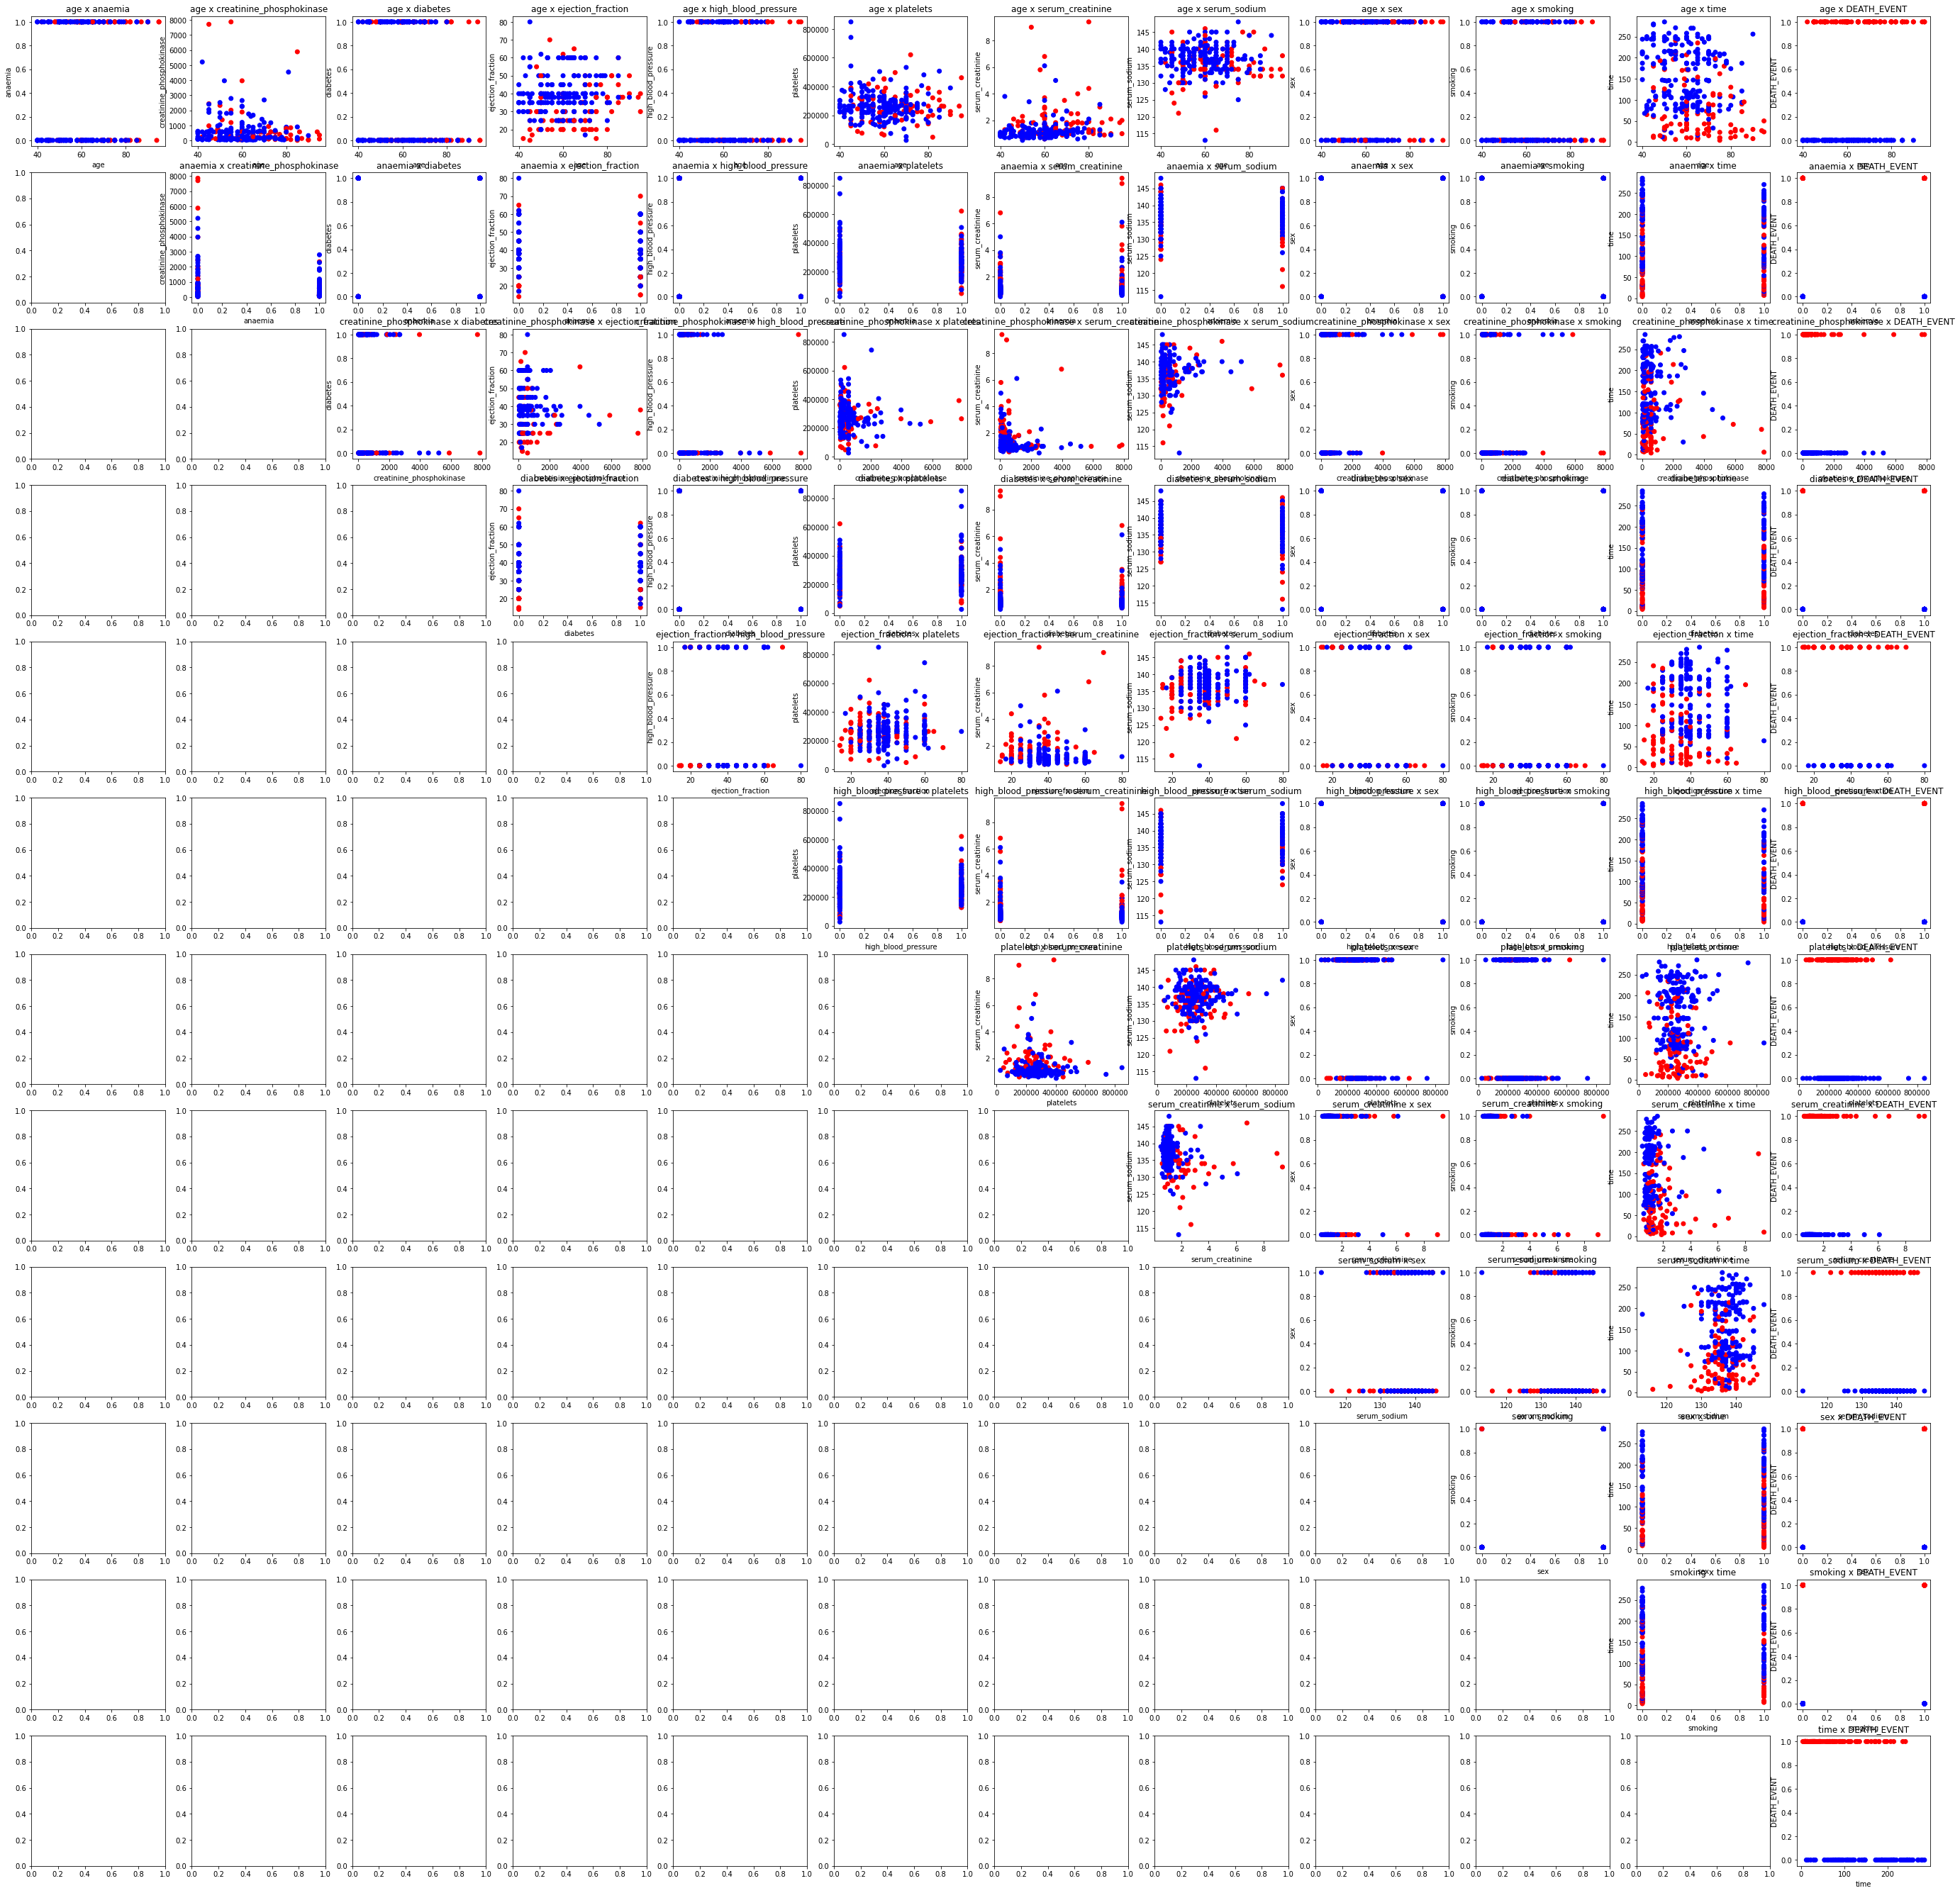

In [14]:
rowscolor=pltcolor(data['DEATH_EVENT']) # Create the colors list using the function above

pd.set_option("max_rows", None)
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2], c=rowscolor)   
plt.show()

# Correlation

In [15]:
import seaborn as sns

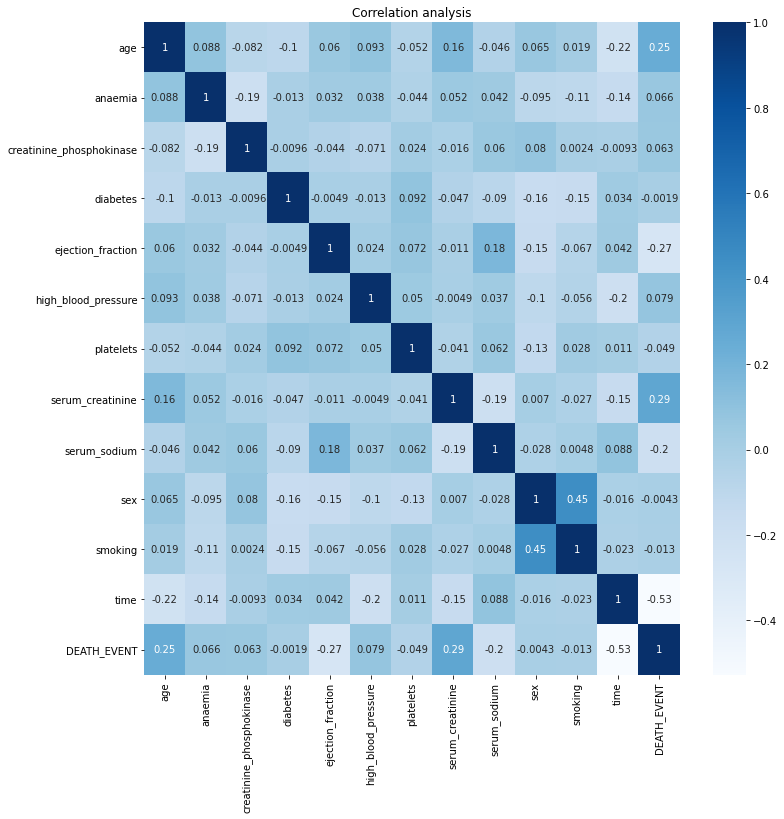

In [16]:
fig = plt.figure(figsize=[12, 12])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

# Sparsity Toxicity

In [78]:
data_tox = pd.read_csv('data/qsar_oral_toxicity1.csv')

In [5]:
import numpy as np

#Indentify correlated variables
corr_mtx = data_tox.corr()
correlated = 0
indexes = []
indexes_analysis = []
for i in range(len(corr_mtx)):
    for j in range(len(corr_mtx)):
        if ((corr_mtx.iat[i,j] > 0.75 or corr_mtx.iat[i,j] < -0.75) and i > j):
            indexes_analysis.append(tuple(([i, j, corr_mtx.iat[i,j]])))
            if((not(i in indexes) and not(j in indexes)) or not(i in indexes)):
                indexes.append(i)
                correlated = correlated + 1           
print(correlated)
print(indexes)

#Remove correlated variables
data_reduced = data_tox.drop(data_tox.columns[indexes], axis=1)
print(len(data_reduced.columns))

93
[53, 78, 101, 125, 168, 208, 222, 233, 236, 288, 302, 321, 383, 386, 394, 399, 405, 407, 408, 414, 424, 437, 465, 467, 473, 490, 506, 524, 534, 535, 539, 556, 557, 558, 561, 566, 576, 600, 602, 618, 620, 626, 635, 640, 646, 656, 657, 671, 672, 678, 683, 685, 690, 702, 728, 732, 738, 739, 749, 753, 754, 758, 759, 781, 786, 788, 813, 819, 823, 827, 835, 851, 869, 871, 873, 884, 890, 899, 905, 915, 922, 934, 960, 963, 976, 980, 985, 989, 995, 997, 1007, 1017, 1018]
932


In [6]:
#Higher correlations
top_variables = 10
indexes_analysis.sort(key=lambda tup: tup[2], reverse=True)  # sorts in place
for i in range(top_variables):
    print(indexes_analysis[i])

(759, 414, 0.9814839030310851)
(871, 685, 0.9752991369381696)
(683, 260, 0.9724906032064131)
(871, 758, 0.9712167080417642)
(819, 456, 0.9708017374130555)
(960, 288, 0.9702245319406764)
(758, 646, 0.9696742926468356)
(405, 178, 0.9693853597484048)
(408, 116, 0.9670224608621305)
(424, 349, 0.9649614112453272)


# Variables correlated with target class

In [7]:
#Indentify correlated variables
corr_mtx = data_tox.corr()
corr_with_target = []
for i in range(len(corr_mtx)-1):
    corr_with_target.append(tuple(([i, abs(corr_mtx.iat[i,1023])*100])))

corr_with_target.sort(key=lambda tup: tup[1], reverse=True)  # sorts in place

show top correlations with target

In [45]:
top_variables = 10
for i in range(top_variables):
    print(corr_with_target[i])

(523, 33.6014930766519)
(687, 32.26337367630151)
(802, 29.810224526472282)
(324, 29.787573599198105)
(765, 29.589963131636516)
(957, 28.12955350226361)
(33, 26.949713216818257)
(190, 25.24322687355582)
(27, 23.936247443960003)
(238, 23.869644416043855)


In [ ]:
#1- retirar variaveis com baixa correlacao. threshold ira ser tipo 90%. ver que variaveis
#estao nesse threshold e mante las. 

#2- representar com diferentes cores o outcome: negativo ou positivo para o toxicity, ie

#3- Alterar a coluna do outcome para int